In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt

%matplotlib inline

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [2]:
df_ads = pd.read_csv('ads_data.csv', parse_dates=['date'])
df_clients_data = pd.read_csv('ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [3]:
# Task 1

mean_clicks_views = df_ads.groupby(['ad_id', 'event'], as_index=False).agg({'time' : 'count'})\
                        .pivot(index='ad_id', columns='event', values='time').fillna(0).mean()

In [4]:
mean_clicks = mean_clicks_views[0]
mean_views = mean_clicks_views[1]

In [5]:
df_new = df_ads.groupby(['ad_id', 'event'], as_index=False).\
                agg({'time' : 'count'}).rename(columns={'time' : 'count'})

In [6]:
df_new_loged_count = np.log(df_new['count'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

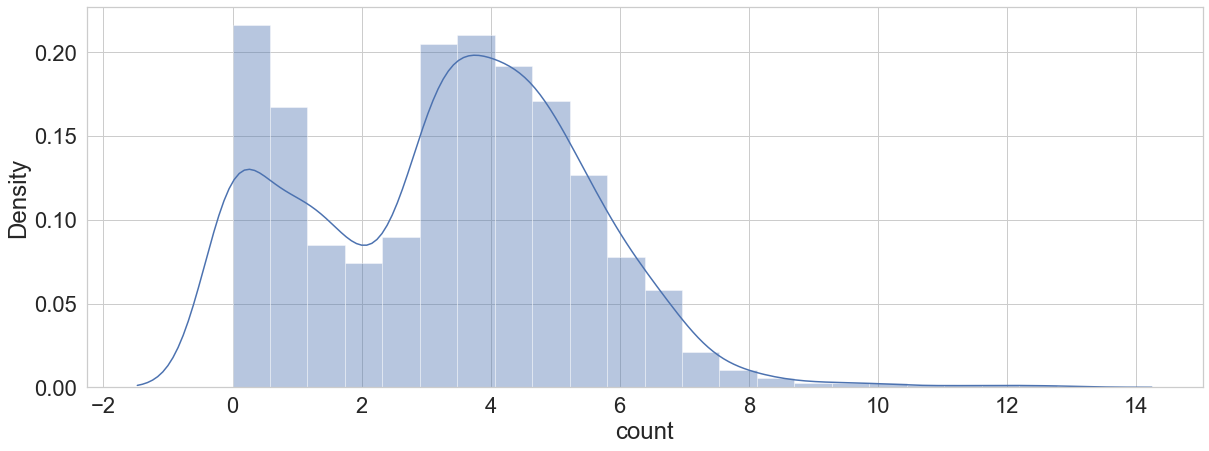

In [7]:
# Task 2

sns.distplot(df_new_loged_count)

In [8]:
# Task 3 and 4

df_ads_mean_view = df_ads.query('event == "view"').groupby(['ad_id', 'date'], as_index=False)\
                    .agg({"platform" : "count"})\
                    .groupby('date', as_index=False).agg({'platform' : 'mean'})

df_ads_rolling_mean = df_ads_mean_view.rolling(window=2).mean()

df_ads_mean_view['rolling'] = df_ads_rolling_mean

df_ads_mean_view['means_diff'] = abs(df_ads_mean_view['rolling'] - df_ads_mean_view['platform'])

In [52]:
# Task 5

full_df = df_ads.merge(df_clients_data, how='left', on='client_union_id')

full_df['time_diff'] = full_df['date_x'] - full_df['create_date']

a = full_df.groupby(['client_union_id'], as_index=False)\
                .agg({'time_diff' : 'min'})

In [74]:
# Task 6

year = pd.Timedelta(365, unit='day')

clients_with_ad = full_df.client_union_id.nunique()
all_clients = df_clients_data.client_union_id.nunique()
conversion = round(clients_with_ad / all_clients * 100, 2)

In [177]:
interval = pd.cut(full_df.time_diff, bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='d'))

In [178]:
full_df['interval'] = interval

In [179]:
# new = full_df.groupby(['client_union_id', 'time_diff'], as_index=False).agg({'date_x' : 'count'})
# new['interval'] = interval

In [180]:
new = full_df.groupby('interval', as_index=False).agg({'client_union_id' : 'nunique'})\
            .sort_values('client_union_id', ascending=False)

In [188]:
import plotly.express as px

In [187]:
new

,interval,client_union_id
2,"(90 days 00:00:00, 180 days 00:00:00]",399
1,"(30 days 00:00:00, 90 days 00:00:00]",265
3,"(180 days 00:00:00, 365 days 00:00:00]",169
0,"(0 days 00:00:00, 30 days 00:00:00]",11
